In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from pyecharts import options as opts
from pyecharts.charts import Bar
import pyecharts.options as opts
from pyecharts.charts import Line
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.commons.utils import JsCode

In [83]:
df = pd.read_csv("2021-12-17_deces_quotidiens_departement.csv",sep= ";",encoding='unicode_escape')
df.sample(10)

,Date_evenement,Zone,Communes_a_envoi_dematerialise_Deces2021,Total_deces_2021,Communes_a_envoi_dematerialise_Deces2020,Total_deces_2020,Communes_a_envoi_dematerialise_Deces2019,Total_deces_2019
5432,04-nov.,Dept_14,5939.0,6787.0,5750,6594,5646,6471
6615,28-janv.,Dept_18,324.0,409.0,258,306,249,303
35779,04-oct.,Dept_971,3705.0,3719.0,2777,2792,2636,2647
27191,17-avr.,Dept_73,1172.0,1310.0,1190,1344,1144,1277
9825,05-nov.,Dept_27,3369.0,4068.0,3456,4190,3199,3802
21600,07-janv.,Dept_58,76.0,92.0,61,68,56,59
24580,28-févr.,Dept_66,950.0,1056.0,912,1041,949,1061
27062,10-déc.,Dept_72,5063.0,NaN,5033,5661,4811,5411
37069,13-avr.,Dept_976,410.0,410.0,290,290,219,219
12684,28-août,Dept_33,9393.0,10371.0,8778,9595,8997,9856


In [121]:
def change_date(date):
    date = date.split("-")
    day = str(date[0])
    mois = date[1]
    m = 0
    if mois == "janv.":
        m = "01"
    elif mois == "févr.":
        m = "02"
    elif mois == "mars":
        m = "03"
    elif mois == "avr.":
        m = "04"
    elif mois == "mai":
        m ="05"
    elif mois == "juin":
        m = "06"
    elif mois == "juil.":
        m = "07"
    elif mois == "août":
        m ="08"
    elif mois == "sept.":
        m = "09"
    elif mois == "oct.":
        m = "10"
    elif mois == "nov.":
        m = "11"
    elif mois == "déc.":
        m = "12"

    if m !=  0 :
        ## lis = "2021" + str(m) + str(day)
        lis =  str(day) +"/" + str(m)
    else:
        lis = "False"
    return lis

def make_month(mon):
    mon = mon.split("-")
    mois = mon[1]
    m = 0
    if mois == "janv.":
        m = "01"
    elif mois == "févr.":
        m = "02"
    elif mois == "mars":
        m = "03"
    elif mois == "avr.":
        m = "04"
    elif mois == "mai":
        m ="05"
    elif mois == "juin":
        m = "06"
    elif mois == "juil.":
        m = "07"
    elif mois == "août":
        m ="08"
    elif mois == "sept.":
        m = "09"
    elif mois == "oct.":
        m = "10"
    elif mois == "nov.":
        m = "11"
    elif mois == "déc.":
        m = "12"
    if m == 0:
        m = "F"
    return m

df["Date"] = df["Date_evenement"].apply(change_date)
df["Month"] = df["Date_evenement"].apply(make_month)
df["Month"][:10]

0    01
1    01
2    01
3    01
4    01
5    01
6    01
7    01
8    01
9    01
Name: Month, dtype: object

In [85]:
df.iloc[14853,]

Date_evenement                               01-août
Zone                                         Dept_39
Communes_a_envoi_dematerialise_Deces2021        1311
Total_deces_2021                                1622
Communes_a_envoi_dematerialise_Deces2020        1321
Total_deces_2020                                1612
Communes_a_envoi_dematerialise_Deces2019        1234
Total_deces_2019                                1512
Date                                        20210801
Name: 14853, dtype: object

In [86]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d', errors='coerce')

In [91]:
df.columns

Index(['Date_evenement', 'Zone', 'Communes_a_envoi_dematerialise_Deces2021',
       'Total_deces_2021', 'Communes_a_envoi_dematerialise_Deces2020',
       'Total_deces_2020', 'Communes_a_envoi_dematerialise_Deces2019',
       'Total_deces_2019', 'Date'],
      dtype='object')

In [97]:
df_6 = df[df["Zone"] == 'Dept_06']

In [122]:
li = [1,5,6,2,4]
max(li)

6

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37332 entries, 0 to 37331
Data columns (total 9 columns):
Date_evenement                              37332 non-null object
Zone                                        37332 non-null object
Communes_a_envoi_dematerialise_Deces2021    35190 non-null float64
Total_deces_2021                            34782 non-null float64
Communes_a_envoi_dematerialise_Deces2020    37332 non-null int64
Total_deces_2020                            37332 non-null int64
Communes_a_envoi_dematerialise_Deces2019    37332 non-null int64
Total_deces_2019                            37332 non-null int64
Date                                        37230 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 2.6+ MB


In [10]:
df.describe()

,Communes_a_envoi_dematerialise_Deces2021,Total_deces_2021,Communes_a_envoi_dematerialise_Deces2020,Total_deces_2020,Communes_a_envoi_dematerialise_Deces2019,Total_deces_2019
count,35190.000000,34782.000000,37332.000000,37332.000000,37332.000000,37332.000000
mean,5688.228417,6189.873785,5938.921194,6521.006322,5624.046930,6156.033323
std,32374.801852,35211.344132,34128.141071,37473.313543,32100.242694,35123.901600
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,924.000000,1073.250000,906.000000,1063.000000,929.000000,1078.000000
50%,2005.000000,2283.000000,2039.500000,2347.000000,2018.000000,2292.000000
75%,4004.000000,4331.000000,4184.000000,4621.250000,3920.250000,4307.000000
max,558469.000000,606573.000000,608731.000000,669170.000000,560343.000000,613456.000000


In [111]:
a = (
    Line()
    .add_xaxis(list(df_6["Date"]))
    .add_yaxis(
        "2021",
        list(df_6["Total_deces_2021"]),
         
        markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]),
    )
    .add_yaxis(
        "C2021",
        list(df_6["Communes_a_envoi_dematerialise_Deces2020"]),
        markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]),
    )
        .add_yaxis(
        "2020",
        list(df_6["Total_deces_2020"]),
        markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]),
    )
    .add_yaxis(
        "2019",
        list(df_6["Total_deces_2019"]),
        markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]),
    )
    .set_series_opts(
        areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Salaire mensuel moyen des différents départements change avec l'âge" ,pos_top =0 ),
    legend_opts=opts.LegendOpts(pos_top="5%"),
    )
)

a.render_notebook()

In [126]:
b = (
    Line()
    .add_xaxis(list(df_6["Date"]))
    .add_yaxis(
        "2021",
        list(df_6["Total_deces_2021"]),
        markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]),
    )
        .add_yaxis(
        "2020",
        list(df_6["Total_deces_2020"]),
        markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]),
    )
    .add_yaxis(
        "2019",
        list(df_6["Total_deces_2019"]),
        markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]),
    )
    .set_series_opts(
        ### areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Salaire mensuel moyen des différents départements change avec l'âge" ,pos_top =0 ),
    legend_opts=opts.LegendOpts(pos_top="5%"),)
)

b.render_notebook()

C:\Users\DENG\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


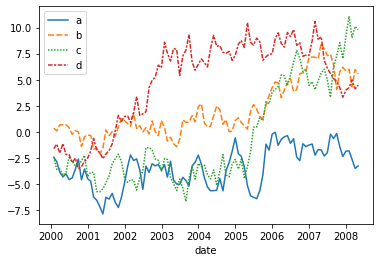

In [134]:
index = pd.date_range("1 1 2000", periods=100,
                      freq="m", name="date")
data = np.random.randn(100, 4).cumsum(axis=0)
wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"])
ax = sns.lineplot(data=wide_df)

In [123]:
Zone = df.groupby(by = "Zone").max().reset_index()
Zone = Zone[Zone["Zone"]!= "France"]

In [124]:
z = (
    Line()
    .add_xaxis(list(Zone["Zone"]))
    .add_yaxis(
        "2021",
        list(Zone["Total_deces_2021"]),
        markpoint_opts=opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(type_="max", name="最大值"),
                opts.MarkPointItem(type_="min", name="最小值"),
            ]
        ),
        
    )
    .add_yaxis(
        "2020",
        list(Zone["Total_deces_2020"]),
        
    )
    .add_yaxis(
        "2019",
        list(Zone["Total_deces_2019"]),
    
    )
    .set_series_opts(
        ### areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Salaire mensuel moyen des différents départements change avec l'âge" ,pos_top =0 ),
    legend_opts=opts.LegendOpts(pos_top="5%"),)
)

z.render_notebook()

In [129]:
df_patho = pd.read_csv("donnees-vaccination-par-pathologie.csv",sep= ";",encoding='unicode_escape')
df_patho.sample(10)

,date_reference,regroupement_pathologie,pathologie,region_residence,libelle_region,departement_residence,libelle_departement,population_ref_cartographie,population_patho_cartographie,effectif_1_inj_pathologie,effectif_termine_pathologie,taux_1_inj_pathologie,taux_termine_pathologie,ordre
4967,2021-12-12,Pathologies psychiatriques et neurologiques,DÃ©mences (dont maladie d'Alzheimer),76,Occitanie,12,Aveyron,227200,3200.0,2880.0,2860.0,0.900,0.892,29.0
1010,2021-12-12,Autres catÃ©gories de pathologies,Transplantation rÃ©nale,76,Occitanie,66,PyrÃ©nÃ©es-Orientales,410770,280.0,240.0,240.0,0.878,0.874,50.0
5767,2021-12-12,Pathologies psychiatriques et neurologiques,Retard mental,04,RÃ©union,Tout dÃ©partement,FRANCE,674330,1290.0,900.0,880.0,0.696,0.679,34.0
2256,2021-12-12,Cancers sous surveillance,Cancer du sein de la femme sous surveillance,84,Auvergne-RhÃ´ne-Alpes,15,Cantal,117470,1340.0,1260.0,1250.0,0.940,0.934,9.0
5975,2021-12-12,Pathologies psychiatriques et neurologiques,Tabagisme,11,Ile-de-France,75,Paris,1805910,58570.0,52750.0,52230.0,0.901,0.892,36.0
1682,2021-12-12,Cancers actifs,Toutes pathologies de la catÃ©gorie,76,Occitanie,30,Gard,624710,14380.0,12880.0,12760.0,0.895,0.888,NaN
3028,2021-12-12,Maladies inflammatoires et de la peau,Toutes pathologies de la catÃ©gorie,11,Ile-de-France,78,Yvelines,1145890,18080.0,16020.0,15890.0,0.886,0.879,NaN
170,2021-12-12,Autres catÃ©gories de pathologies,Dialyse chronique,44,Grand Est,52,Haute-Marne,136790,140.0,130.0,130.0,0.970,0.970,43.0
3966,2021-12-12,Pathologies cardiomÃ©taboliques,Insuffisance cardiaque,52,Pays de la Loire,72,Sarthe,445890,5670.0,5050.0,4990.0,0.891,0.880,14.0
4443,2021-12-12,Pathologies cardiomÃ©taboliques,ObÃ©sitÃ© (sÃ©jour hospitalier),11,Ile-de-France,77,Seine-et-Marne,1095930,19200.0,16810.0,16610.0,0.875,0.865,18.0


In [132]:
df_open = pd.read_csv("table-indicateurs-open-data-dep-2022-01-10-19h09.csv",sep=",")
df_open.sample(5)

C:\Users\DENG\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dep,date,reg,lib_dep,lib_reg,tx_pos,tx_incid,TO,R,hosp,...,dchosp,reg_rea,incid_hosp,incid_rea,incid_rad,incid_dchosp,reg_incid_rea,pos,pos_7j,cv_dose1
65279,973,2020-10-11,3,Guyane,Guyane,4.177898,42.656979,0.461538,NaN,22,...,65,6,0.0,0.0,0.0,0.0,0.0,2.0,124.0,NaN
19152,2A,2021-09-29,94,Corse-du-Sud,Corse,1.014448,60.952709,0.333333,NaN,27,...,123,6,2.0,0.0,1.0,0.0,0.0,14.0,99.0,NaN
2071,04,2020-06-05,93,Alpes-de-Haute-Provence,Provence-Alpes-Côte d'Azur,0.120482,0.605338,0.143478,NaN,13,...,12,66,0.0,0.0,0.0,0.0,2.0,0.0,1.0,NaN
32064,48,2020-09-26,76,Lozère,Occitanie,5.177373,70.786252,0.213080,0.99,4,...,1,101,0.0,0.0,0.0,0.0,8.0,0.0,54.0,NaN
53679,80,2021-09-28,32,Somme,Hauts-de-France,0.611320,19.657089,0.219178,NaN,98,...,977,96,3.0,1.0,2.0,0.0,6.0,19.0,112.0,NaN


In [133]:
df_open.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67064 entries, 0 to 67063
Data columns (total 22 columns):
dep              67064 non-null object
date             67064 non-null object
reg              67064 non-null int64
lib_dep          67064 non-null object
lib_reg          67064 non-null object
tx_pos           60499 non-null float64
tx_incid         60499 non-null float64
TO               67064 non-null float64
R                10298 non-null float64
hosp             67064 non-null int64
rea              67064 non-null int64
rad              67064 non-null int64
dchosp           67064 non-null int64
reg_rea          67064 non-null int64
incid_hosp       66963 non-null float64
incid_rea        66963 non-null float64
incid_rad        66963 non-null float64
incid_dchosp     66963 non-null float64
reg_incid_rea    66963 non-null float64
pos              61105 non-null float64
pos_7j           60499 non-null float64
cv_dose1         96 non-null float64
dtypes: float64(12), int64(6),

In [ ]:
df_open[df_open.reg == 6]

In [153]:
df_vac = pd.read_csv("vacsi12-dep-2022-01-10-19h09.csv",sep=";")
df_vac.sample(5)

,dep,jour,n_dose1,n_complet,n_rappel,n_cum_dose1,n_cum_complet,n_cum_rappel,couv_dose1,couv_complet,couv_rappel
24108,63,2021-08-15,181,1346,0,472315,415425,1,81.9,72.0,0.0
26829,70,2021-10-22,97,139,570,175687,172373,9174,86.4,84.8,4.5
3796,11,2021-01-02,3,0,0,5,0,0,0.0,0.0,0.0
24716,65,2021-03-18,505,227,0,24791,12490,0,12.3,6.2,0.0
11036,2B,2021-02-10,441,211,0,8027,1592,0,5.0,1.0,0.0


In [138]:
df_vac.shape

(36384, 11)

In [147]:
df_vac.dep.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95'], dtype=object)

In [154]:
df_vac_06 = df_vac[df_vac["dep"]== '06']

In [158]:
vac = (
    Line()
    .add_xaxis(list(df_vac_06["jour"]))
    .add_yaxis(
        "2021",
        list(df_vac_06["n_dose1"]),
        markpoint_opts=opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(type_="max", name="最大值"),
                ### opts.MarkPointItem(type_="min", name="最小值"),
            ]
        ),
    )  
    .set_series_opts(
        ### areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Le nombre de vaccination d'Alpes" ,pos_top =0 ),
    legend_opts=opts.LegendOpts(pos_top="5%"),)
)

vac.render_notebook()

In [165]:
df_vac_test_3dep = df_vac[(df_vac.dep == "06") | (df_vac.dep == "59") | (df_vac.dep == "75")]
df_vac_test_3dep.jour = pd.to_datetime(df_vac_test_3dep.jour)

C:\Users\DENG\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [167]:
df_vac_test_3dep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 1895 to 28803
Data columns (total 11 columns):
dep              1137 non-null object
jour             1137 non-null datetime64[ns]
n_dose1          1137 non-null int64
n_complet        1137 non-null int64
n_rappel         1137 non-null int64
n_cum_dose1      1137 non-null int64
n_cum_complet    1137 non-null int64
n_cum_rappel     1137 non-null int64
couv_dose1       1137 non-null float64
couv_complet     1137 non-null float64
couv_rappel      1137 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(6), object(1)
memory usage: 106.6+ KB


In [168]:
##sns.lineplot(data=df_vac_test_3dep, x='jour',y='n_dose1',hue='dep')
##plt.show()

sns.scatterplot(data = df_vac_test_3dep,
                x = "jour", 
                y = "n_dose1", 
                hue = "dep",
                palette = sns.light_palette("seagreen", as_cmap=True))

plt.show()

AttributeError: 'str' object has no attribute 'view'

In [141]:
df_vac["jour"] = pd.to_datetime(df_vac.jour)

In [140]:
df_vac.groupby(by="dep").count()

,jour,n_dose1,n_complet,n_rappel,n_cum_dose1,n_cum_complet,n_cum_rappel,couv_dose1,couv_complet,couv_rappel
dep,,,,,,,,,,
01,379,379,379,379,379,379,379,379,379,379
02,379,379,379,379,379,379,379,379,379,379
03,379,379,379,379,379,379,379,379,379,379
04,379,379,379,379,379,379,379,379,379,379
05,379,379,379,379,379,379,379,379,379,379
06,379,379,379,379,379,379,379,379,379,379
07,379,379,379,379,379,379,379,379,379,379
08,379,379,379,379,379,379,379,379,379,379
09,379,379,379,379,379,379,379,379,379,379


In [ ]:
janv
févr
mars
avr
mai
juin
juil
août
sept
oct
nov
déc
